#### OTU as a function of fastq_maxee, min_size, fastq_trunclen

In [2]:
import os, subprocess, IPython.display, re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fastq_dir = '~/fastqs/*_R1_*.fastq'

In [17]:
def usearch_func(fastqin, maxee, trunclen, minsize):
    """return usearch outputs as a string"""
    commands = ['usearch -fastq_mergepairs %s -relabel @ -fastqout merged.fastq' %fastqin,    
                
                'usearch -fastq_filter merged.fastq \
                -fastq_maxee %f \
                -fastq_trunclen %d \
                -fastaout seqs.fna -fastqout seqs.fastq' %(maxee, trunclen), 
                
                'fastqc seqs.fastq --extract --quiet',
                'usearch -cluster_otus seqs.derep.fna -sizein -minsize %d \
                -otus rep_set.fa -relabel OTU_' %minsize ]
    outputs = ''
    for command in commands:
        out = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
        outputs = outputs + out + '\n'

    return outputs

In [38]:
def parseUsearch(usearch_out_string):
    search_list = [r'\d+\s+FASTQ', r'\d+\s+Converted', r'\d\d\sOTUs']
    res_list = []
    for pattern in search_list:
        match = re.search(pattern, usearch_out_string)
        matched_string = match.group()
        num, name = matched_string.split()
        num = int(num)
        res_list.append((num, name))
    return res_list

In [39]:
parseUsearch(usearch_func(fastq_dir, 1.0, 250, 5))

[(28472, 'FASTQ'), (24036, 'Converted'), (21, 'OTUs')]

[('all', 543970), ('highQ', 492168), ('OTUs', 21)]


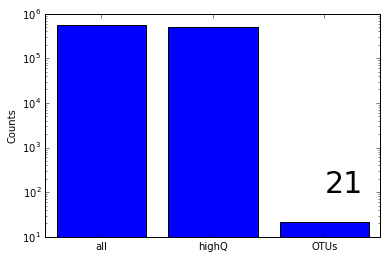

In [27]:
# --------------------------------------------------------------
categories, y = zip(*d)
x = range(len(categories))
plt.bar(x, y, align='center', log=True)
plt.xticks(x, categories)
plt.ylabel('Counts')
plt.annotate('21', xy=(2, 100), fontsize = 30)

## The OTU Table Ready for downstream analyis

In [12]:
otuTable = 'usearch -usearch_global merged.fastq -db rep_set.fa -id 0.97 -strand plus -biomout otu.json'
subprocess.call(otuTable, shell=True)
printBiom = 'biom head -i otu.json -n 21 | sed 1d'
print subprocess.check_output(printBiom, shell=True)

#OTU ID	MockS11	MockS12	MockS24	MockS48
OTU_18	11049.0	243.0	262.0	67.0
OTU_4	31059.0	820.0	367.0	287.0
OTU_8	28153.0	754.0	410.0	185.0
OTU_3	31780.0	723.0	569.0	306.0
OTU_12	20871.0	765.0	702.0	114.0
OTU_6	29167.0	768.0	701.0	199.0
OTU_16	18145.0	388.0	319.0	169.0
OTU_2	35353.0	1179.0	554.0	318.0
OTU_17	15219.0	449.0	258.0	63.0
OTU_11	27104.0	657.0	306.0	223.0
OTU_5	31137.0	881.0	471.0	196.0
OTU_10	26936.0	673.0	526.0	274.0
OTU_13	29772.0	897.0	515.0	261.0
OTU_1	59765.0	1422.0	1140.0	461.0
OTU_14	19208.0	555.0	507.0	181.0
OTU_15	18473.0	577.0	259.0	77.0
OTU_9	26053.0	877.0	507.0	166.0
OTU_7	29974.0	849.0	349.0	204.0
OTU_19	144.0	12.0	33.0	22.0
OTU_20	28.0	0.0	0.0	0.0
OTU_21	0.0	0.0	20.0	0.0

